# Netflix_Dataset_Analysis

Task 1 : What is the most popular realase year for movies on Netflix

Task 2 : What year did netflix add the most content to its platform ?

Task 3 : Independent of year, what is the most popular month to add new content?

Task 4 : What is the movie with longest title

Task 5 : Most frequent actor/actoress in Netflix

Task 6 : How many movies are there compared to TV shows?

Task 7 : Which countries contribute the most content to Netflix?

Task 8 :  Which genres are more prevalent on Netflix?


In [173]:
#Import necessary libararies 
import pandas as pd
import matplotlib.pyplot  as plt

## Task 1 : What is the most popular realase year for movies on Netflix

In [14]:
df = pd.read_csv('/Users/sakshichavan/Downloads/netflix_titles.csv')


In [17]:
movie_df = df[df['type'] == 'Movie']

In [26]:
movie_df['count'] = 1 
release_yr_summed = movie_df.groupby(['release_year']).sum().reset_index()[['release_year','count']]

<ipython-input-26-944a019553b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['count'] = 1


In [27]:
release_yr_summed.sort_values(['count'], ascending = False)

,release_year,count
69,2018,767
68,2017,767
67,2016,658
70,2019,633
71,2020,517
...,...,...
12,1961,1
14,1963,1
17,1966,1
5,1947,1


## Task 2 : What year did netflix add the most content to its platform ?

In [34]:
df['new_date'] = pd.to_datetime(df['date_added'])

df['date_added_yr'] = df['new_date'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_yr
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0


In [36]:
df['count'] = 1 
date_added_yr_summed = df.groupby(['date_added_yr']).sum().reset_index()[['date_added_yr','count']]

In [38]:
date_added_yr_summed.sort_values(['count'], ascending = False)

,date_added_yr,count
11,2019.0,2016
12,2020.0,1879
10,2018.0,1649
13,2021.0,1498
9,2017.0,1188
8,2016.0,429
7,2015.0,82
6,2014.0,24
3,2011.0,13
5,2013.0,11


## Task 3 : Independent of year, what is the most popular month to add new content?

In [47]:
df['date_month'] = df['new_date'].dt.month
df['date_month_str'] = df['new_date'].dt.strftime('%b')
df = df.drop(['date_month', 'date_month_str'], axis=1)


In [46]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_yr,count,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,1,Sep
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,1,Sep
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,1,Sep
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,1,Sep
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,1,Sep


In [48]:
date_added_Month_summed = df.groupby(['month']).sum().reset_index()[['month','count']]

In [49]:
date_added_Month_summed.sort_values(['count'], ascending = False)

,month,count
5,Jul,827
2,Dec,813
11,Sep,770
0,Apr,764
10,Oct,760
1,Aug,755
7,Mar,742
4,Jan,738
6,Jun,728
9,Nov,705


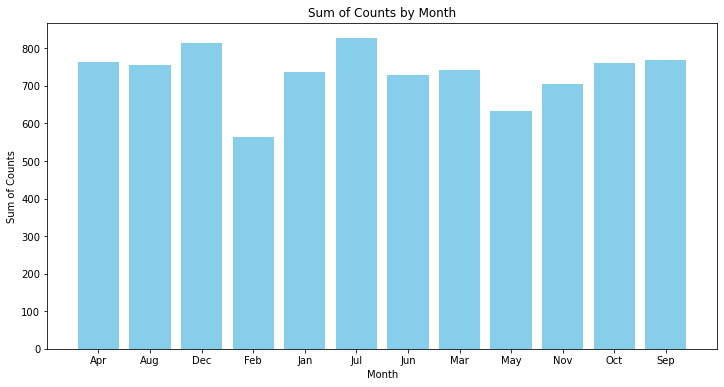

In [98]:
plt.figure(figsize=(12, 6))
plt.bar(date_added_Month_summed['month'], date_added_Month_summed['count'], color='skyblue')
plt.title('Sum of Counts by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Counts')
plt.show()

## Task 4 : What is the movie with longest title?

In [51]:
df.head()
movie_df = df[df['type'] == 'Movie']

In [52]:
movie_df['title_len'] = [len(title) for title in movie_df['title']]

<ipython-input-52-ac2279b537a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['title_len'] = [len(title) for title in movie_df['title']]


In [54]:
top_title_len = movie_df.sort_values(['title_len'], ascending = False)
top_title_len.iloc[0]['title']

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

## Task 5 : Most frequent actor/actoress in Netflix

In [55]:
title_cast_df = df[['title', 'cast']]

In [179]:
cast_name_counter = {}

for index, row in title_cast_df.iterrows():
    movie_cast = row['cast']
    
    if isinstance(movie_cast, str):
        movie_cast_split = movie_cast.split(',')
        movie_cast_stripped = [name.strip().lower() for name in movie_cast_split]
        for name in movie_cast_stripped:
            cast_name_counter[name] = cast_name_counter.get(name, 0) + 1
    
sorted_cast_names = dict(sorted(cast_name_counter.items(), key=lambda item: item[1], reverse = True))

top_10_names = list(sorted_cast_names.items())[:10]
for name, count in top_10_names:
    print(f'{name}: {count}')

anupam kher: 43
shah rukh khan: 35
julie tejwani: 33
naseeruddin shah: 32
takahiro sakurai: 32
rupa bhimani: 31
akshay kumar: 30
om puri: 30
yuki kaji: 29
amitabh bachchan: 28


## Task 6 : How many movies are there compared to TV shows?

In [80]:
monthly_type_distribution = df.groupby(['month', 'type']).size().unstack(fill_value=0)
monthly_type_distribution 

type,Movie,TV Show
month,,
Apr,550,214
Aug,519,236
Dec,547,266
Feb,382,181
Jan,546,192
Jul,565,262
Jun,492,236
Mar,529,213
May,439,193


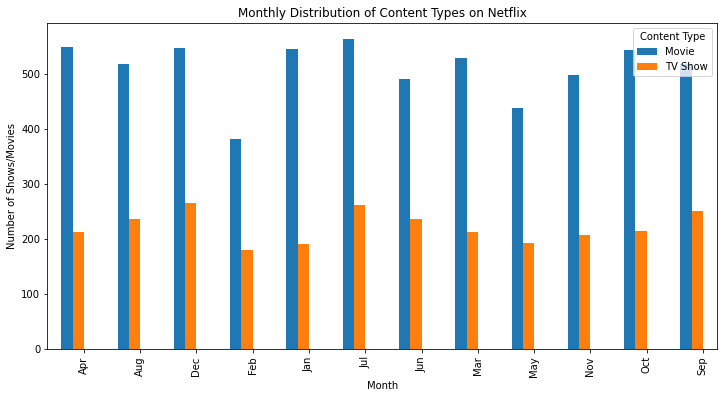

In [122]:
monthly_type_distribution.plot(kind='bar', figsize=(12, 6), width=0.4, position=1)

plt.title('Monthly Distribution of Content Types on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Shows/Movies')
plt.legend(title='Content Type', loc='upper right')
plt.show()

## Task 7 : Which countries contribute the most content to Netflix?

In [128]:
df_cleaned = df.dropna(subset=['country'])
country_counts = df_cleaned['country'].value_counts()

country_counts.head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

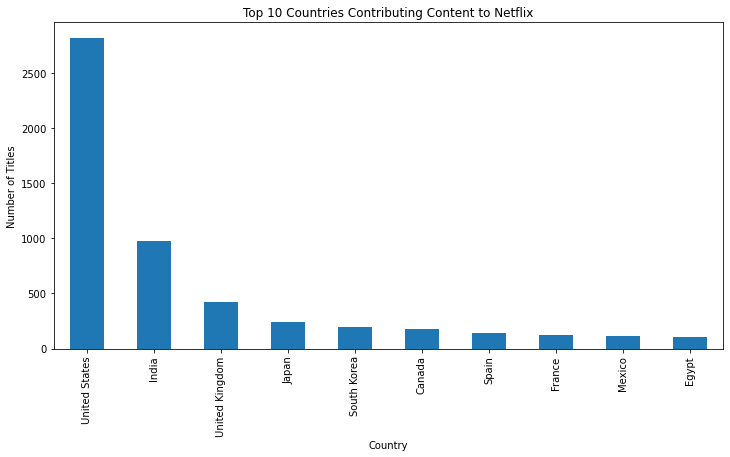

In [129]:
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries Contributing Content to Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

## Task 8 :  Which genres are more prevalent on Netflix?

In [138]:
df_cleaned = df.dropna(subset=['listed_in'])


df_cleaned['genres'] = df_cleaned['listed_in'].str.split(', ')
all_genres = [genre for sublist in df_cleaned['genres'].dropna() for genre in sublist]

genre_counts = pd.Series(all_genres).value_counts()
genre_counts.head(10)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
dtype: int64

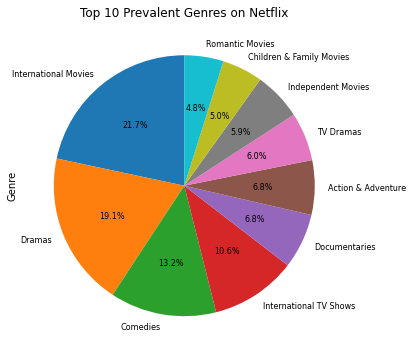

In [168]:
plt.figure(figsize=(6, 6))
top_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, fontsize=8, legend = None)
plt.title('Top 10 Prevalent Genres on Netflix')
plt.ylabel('Genre')
plt.show()